In [1]:
import pandas as pd

# 创建一个空的DataFrame来存储所有年份的数据
all_names = pd.DataFrame()

# 遍历每一年
for year in range(1880, 2011):
    # 读取该年份的数据
    path = f'datasets/babynames/yob{year}.txt'
    names = pd.read_csv(path, names=['name', 'sex', 'births'])
    
    # 添加一个表示年份的列
    names['year'] = year
    
    # 将该年份的数据添加到all_names中
    all_names = pd.concat([all_names, names], ignore_index=True)

# 根据年份和性别对数据进行分组，然后计算每一组的出生总数
total_births = all_names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

# 添加一个表示总体出生数的列
total_births['total'] = total_births['F'] + total_births['M']

total_births

sex,F,M,total
year,,,
1880,90993,110493,201486
1881,91955,100748,192703
1882,107851,113687,221538
1883,112322,104632,216954
1884,129021,114445,243466
...,...,...,...
2006,1896468,2050234,3946702
2007,1916888,2069242,3986130
2008,1883645,2032310,3915955


In [2]:
from sklearn.linear_model import Lasso

# 添加一个表示男女性别比例的列
total_births['ratio'] = total_births['M'] / total_births['F']

# 分割训练集和测试集
train = total_births.loc[1880:1980]
test = total_births.loc[1981:2010]

# 提取特征和目标变量
X_train = train.index.values.reshape(-1, 1)
y_train = train['ratio']
X_test = test.index.values.reshape(-1, 1)

# 创建并训练模型
model = Lasso()
model.fit(X_train, y_train)

# 进行预测
predictions = model.predict(X_test)

# 打印预测结果
for year, prediction in zip(range(1981, 2011), predictions):
    print(f"{year}年, 预测比例: {prediction}")


1981年, 预测比例: 1.0966984276218952
1982年, 预测比例: 1.1010096767186734
1983年, 预测比例: 1.1053209258154517
1984年, 预测比例: 1.10963217491223
1985年, 预测比例: 1.1139434240090083
1986年, 预测比例: 1.1182546731057865
1987年, 预测比例: 1.1225659222025648
1988年, 预测比例: 1.126877171299343
1989年, 预测比例: 1.131188420396123
1990年, 预测比例: 1.1354996694929014
1991年, 预测比例: 1.1398109185896796
1992年, 预测比例: 1.144122167686458
1993年, 预测比例: 1.1484334167832362
1994年, 预测比例: 1.1527446658800145
1995年, 预测比例: 1.1570559149767927
1996年, 预测比例: 1.161367164073571
1997年, 预测比例: 1.1656784131703493
1998年, 预测比例: 1.1699896622671275
1999年, 预测比例: 1.1743009113639058
2000年, 预测比例: 1.178612160460684
2001年, 预测比例: 1.1829234095574623
2002年, 预测比例: 1.1872346586542424
2003年, 预测比例: 1.1915459077510206
2004年, 预测比例: 1.195857156847799
2005年, 预测比例: 1.2001684059445772
2006年, 预测比例: 1.2044796550413555
2007年, 预测比例: 1.2087909041381337
2008年, 预测比例: 1.213102153234912
2009年, 预测比例: 1.2174134023316903
2010年, 预测比例: 1.2217246514284685


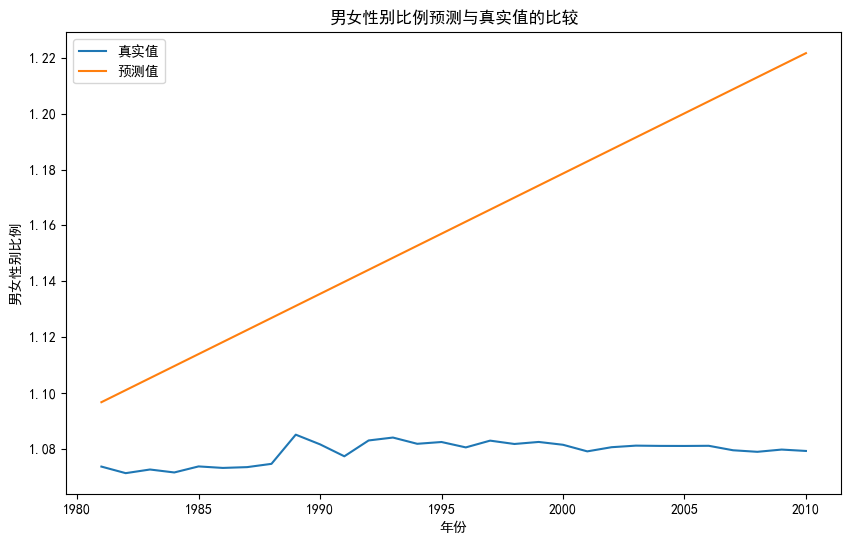

In [3]:
import matplotlib.pyplot as plt
import matplotlib

# 指定字体为SimHei
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算测试集的真实值
y_test = test['ratio']

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制真实值
plt.plot(X_test, y_test, label='真实值')

# 绘制预测值
plt.plot(X_test, predictions, label='预测值')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('男女性别比例预测与真实值的比较')
plt.xlabel('年份')
plt.ylabel('男女性别比例')

# 显示图形
plt.show()

均方误差（MSE）: 0.00767177697050488
根均方误差（RMSE）: 0.08758868060717025


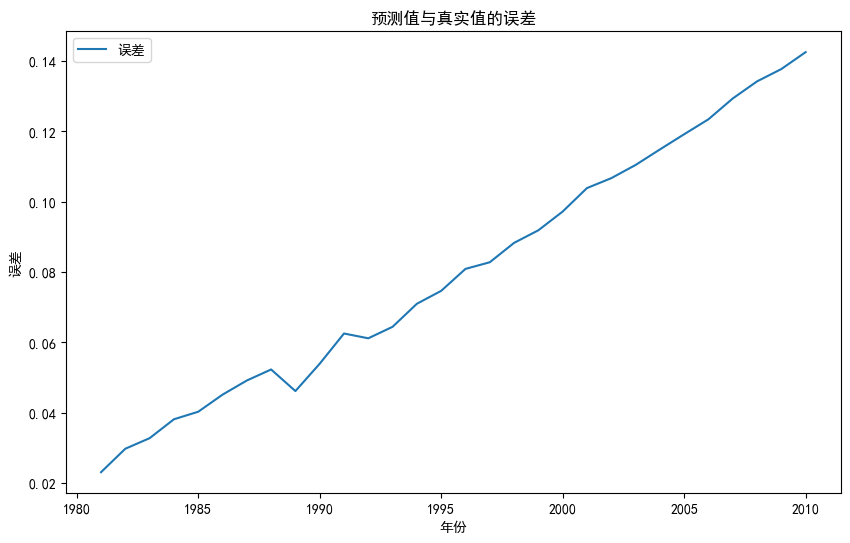

In [4]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt

# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False 
# 更改matplotlib的字体设置
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算均方误差
mse = mean_squared_error(y_test, predictions)

# 计算根均方误差
rmse = np.sqrt(mse)

print(f"均方误差（MSE）: {mse}")
print(f"根均方误差（RMSE）: {rmse}")

# 计算每个预测值与真实值之间的误差
errors = predictions - y_test

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制误差
plt.plot(X_test, errors, label='误差')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('预测值与真实值的误差')
plt.xlabel('年份')
plt.ylabel('误差')

# 显示图形
plt.show()